In [1]:
import torch
import torch.nn as nn


from torch.utils.data import TensorDataset, DataLoader

import numpy as np

from common import *

In [2]:
import logging, sys
logging.basicConfig(stream=sys.stderr, level=logging.INFO)
logging.debug('A debug message!')


In [3]:
torch.autograd.set_detect_anomaly(True)
device = "cpu"

In [4]:
# read the data from the "GeneratorInput.txt" file
def read_data(file_name):
    with open(file_name, 'r') as file:
        data = file.readlines()
    return data

raw_data = read_data("GeneratorInput.txt")

datasets = []
y_idx = 0
dataset = None
for line in raw_data:
    if len(line) <= 1:
        datasets.append(dataset.copy())
        y_idx = 0
        dataset = []
        continue
    y_idx += 1
    if dataset is None:
        dataset = []
    for x_idx,char in enumerate(line):
        if char == '0' or char == '1':
            dataset.append((y_idx,x_idx+1, int(char)))
    

In [5]:
data = datasets[0]
X = torch.tensor([list(sublist[:2]) for sublist in data], dtype=torch.float32)
y = torch.tensor([item for sublist in data for item in sublist[2:]], dtype=torch.float32).unsqueeze(1)


#scale the data to be between 0 and 1
X = X / X.max()
X


tensor([[0.1000, 0.2000],
        [0.2000, 0.1000],
        [0.2000, 0.2000],
        [0.2000, 0.5000],
        [0.2000, 0.9000],
        [0.2000, 1.0000],
        [0.3000, 0.1000],
        [0.3000, 0.5000],
        [0.3000, 0.8000],
        [0.4000, 0.4000],
        [0.4000, 0.5000],
        [0.4000, 0.6000],
        [0.4000, 0.7000],
        [0.4000, 0.8000],
        [0.5000, 0.2000],
        [0.5000, 0.3000],
        [0.5000, 0.7000],
        [0.6000, 0.4000],
        [0.6000, 0.6000],
        [0.7000, 0.4000],
        [0.7000, 0.8000],
        [0.7000, 0.9000],
        [0.8000, 0.3000],
        [0.8000, 0.5000],
        [0.8000, 0.6000],
        [0.8000, 0.7000],
        [0.8000, 0.8000],
        [0.8000, 1.0000],
        [0.9000, 0.1000],
        [0.9000, 0.2000],
        [0.9000, 0.5000],
        [0.9000, 0.7000],
        [1.0000, 0.1000],
        [1.0000, 0.2000],
        [1.0000, 0.8000],
        [1.0000, 0.9000],
        [1.0000, 1.0000]])

# Network 2

In [6]:
# Create a PyTorch dataset and data loader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)


model = Network3()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.005)
total_epochs = 0
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Epoch [10/500] total 10, Loss: 0.5647, Accuracy: 67.57
Epoch [20/500] total 20, Loss: 0.4533, Accuracy: 70.27
Epoch [30/500] total 30, Loss: 0.6149, Accuracy: 72.97
Epoch [40/500] total 40, Loss: 1.0020, Accuracy: 70.27
Epoch [50/500] total 50, Loss: 0.8524, Accuracy: 67.57
Epoch [60/500] total 60, Loss: 0.4726, Accuracy: 67.57
Epoch [70/500] total 70, Loss: 0.4619, Accuracy: 67.57
Epoch [80/500] total 80, Loss: 0.7206, Accuracy: 64.86
Epoch [90/500] total 90, Loss: 0.4584, Accuracy: 64.86
Epoch [100/500] total 100, Loss: 0.4800, Accuracy: 64.86
Epoch [110/500] total 110, Loss: 0.4213, Accuracy: 64.86
Epoch [120/500] total 120, Loss: 0.6987, Accuracy: 64.86
Epoch [130/500] total 130, Loss: 0.4469, Accuracy: 64.86
Epoch [140/500] total 140, Loss: 0.4439, Accuracy: 64.86
Epoch [150/500] total 150, Loss: 0.4705, Accuracy: 64.86
Epoch [160/500] total 160, Loss: 0.4019, Accuracy: 67.57
Epoch [170/500] total 170, Loss: 1.0324, Accuracy: 67.57
Epoch [180/500] total 180, Loss: 0.4480, Accuracy

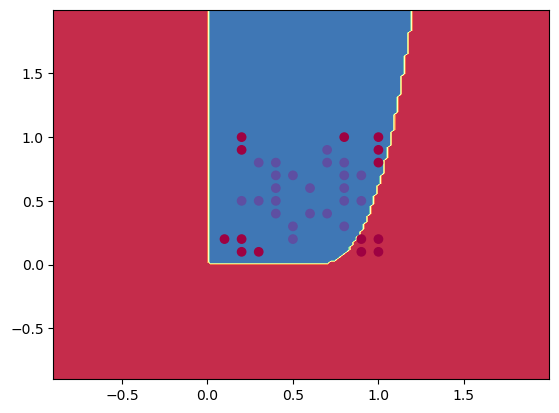

In [7]:
# Train the model
num_epochs = 500
for epoch in range(num_epochs):
    for X_batch, y_batch in dataloader:
        # print(f"y_pred is {y_pred} and y_batch is {y_batch}")
        y_pred = model(X_batch)
        
        # replace y_pred nan with 0
        # y_pred = torch.nan_to_num(y_pred)

        logging.debug(f"y_pred is {y_pred} and y_batch is {y_batch}")
        
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()

        loss.backward()
        # clip the gradients
        # for param in model.parameters():
        #     param.grad.data.clamp_(-100, 100)

        optimizer.step()

        for name, param in model.named_parameters(): 
            logging.debug(f"{name} has gradient {param.grad}")

    # calculate accuracy for all training data
    y_pred = model(X)
    y_pred = torch.round(y_pred)
    correct = (y_pred == y).sum().item()
    accuracy = correct / len(y)
    total_epochs += 1
    

    if accuracy > 0.99:
        print("HOORAY")
        break
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}] total {total_epochs}, Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}")
    

plot_decision_boundary(model, X, y)

In [8]:
# print all parameters of the model
for name, param in model.named_parameters():
    print(f"{name} has shape {param.shape} and value {param}")

# print model gradients
for name, param in model.named_parameters(): 
    print(f"{name} has gradient {param.grad}")
    

bias has shape torch.Size([1]) and value Parameter containing:
tensor([0.6237], requires_grad=True)
synapse1.power has shape torch.Size([1]) and value Parameter containing:
tensor([1.], requires_grad=True)
synapse1.term_weights has shape torch.Size([3]) and value Parameter containing:
tensor([-0.5553,  0.2210,  0.3244], requires_grad=True)
product_synapse.power has shape torch.Size([1]) and value Parameter containing:
tensor([2.], requires_grad=True)
product_synapse.term_weights has shape torch.Size([3]) and value Parameter containing:
tensor([0.9549, 0.6884, 0.8028], requires_grad=True)
bias has gradient None
synapse1.power has gradient None
synapse1.term_weights has gradient None
product_synapse.power has gradient None
product_synapse.term_weights has gradient None
